In [1]:
import os

import numpy as np

In [2]:
x, y = {'diff_sum': [], 'diff_max': []}, {'diff_sum': [], 'diff_max': []}
name = []


for root, _, file_names in os.walk('./temp'): 
    for file_name in file_names:
        _data = np.load(os.path.join(root, file_name), allow_pickle=True).item()
        _expression_counts = np.array(_data['expression_counts'])
        _volumes = np.array(_data['volumes'])

        _x_max, _x_min = max(_volumes), min(_volumes)
        _x_mean = _volumes.mean()
        _x_diff = list(np.diff(_volumes))
        _x_diff_sum = sum(abs(np.array(_x_diff)))
        _x_diff_max = max(abs(np.array(_x_diff)))

        _y_max, _y_min = max(_expression_counts), min(_expression_counts)
        _y_mean = _expression_counts.mean()
        _y_diff = list(np.diff(_expression_counts))
        _y_diff_sum = sum(abs(np.array(_y_diff)))
        _y_diff_max = max(abs(np.array(_y_diff)))

        x['diff_sum'].append(_x_diff_sum/_x_mean)
        x['diff_max'].append(_x_diff_max/_x_mean)

        y['diff_sum'].append(_y_diff_sum/_y_mean)
        y['diff_max'].append(_y_diff_max/_y_mean)
        
        name.append(file_name.split('.')[0])


# for root, _, file_names in os.walk('./temp'): 
#     for file_name in file_names:
#         _data = np.load(os.path.join(root, file_name), allow_pickle=True).item()
#         _expression_counts = np.array(_data['expression_counts'])
#         _volumes = np.array(_data['volumes'])

#         _index = np.argmax(_expression_counts)
#         _expression_counts = _expression_counts[:_index+1]
#         _volumes = _volumes[:_index+1]
#         _expression_counts = (_expression_counts - min(_expression_counts)) / (max(_expression_counts) - min(_expression_counts))
#         _volumes = (_volumes - min(_volumes)) / (max(_volumes) - min(_volumes))

#         _x_diff = list(np.diff(_volumes))
#         _x_diff_sum = sum(abs(np.array(_x_diff)))
#         _x_diff_max = max(abs(np.array(_x_diff)))

#         _y_diff = list(np.diff(_expression_counts))
#         _y_diff_sum = sum(abs(np.array(_y_diff)))
#         _y_diff_max = max(abs(np.array(_y_diff)))

#         x['diff_sum'].append(_x_diff_sum)
#         x['diff_max'].append(_x_diff_max)

#         y['diff_sum'].append(_y_diff_sum)
#         y['diff_max'].append(_y_diff_max)
        
#         name.append(file_name.split('.')[0])

In [3]:
import sys
sys.path.append('/lmh_data/work/SEE/train/')
sys.path.append('/lmh_data/work/SEE/analyse/')

import seaborn as sns
import matplotlib.pyplot as plt
from analyse_util import figure_size, set_plt, set_Border

def show(_x, _y, _xlabel, _ylabel, file_name = None):
    set_plt(figsize=(20, 10))
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()

    ax.scatter(_x[_xlabel], _y[_ylabel], edgecolors='black', s=(figure_size['large']*72./fig.dpi)**2)
    for i in range(len(_x[_xlabel])):
        _x_list, _y_list = _x[_xlabel], _y[_ylabel]
        ax.annotate(
            name[i], xy=(_x_list[i], _y_list[i]), xytext=(_x_list[i]+max(_x_list)/100, _y_list[i]+max(_x_list)/100))
    
    parameter = np.polyfit(_x[_xlabel], _y[_ylabel], 1)
    _y2 = parameter[0] * np.array(_x[_xlabel]) + parameter[1]
#     print('{} {}'.format(parameter[0], parameter[1]))
    plt.plot(_x[_xlabel], _y2, color='g')

    set_Border(plt.gca())
    plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
    plt.grid(False)
    plt.xlabel('volume({})'.format(_xlabel), fontsize=figure_size['ultra'])
    plt.ylabel('expression({})'.format(_ylabel), fontsize=figure_size['ultra'])
    
    if file_name:
        plt.savefig(
            '/lmh_data/work/SEE/analyse/figure_file/{}.pdf'.format(file_name), format='pdf', bbox_inches='tight')
    
    plt.show()

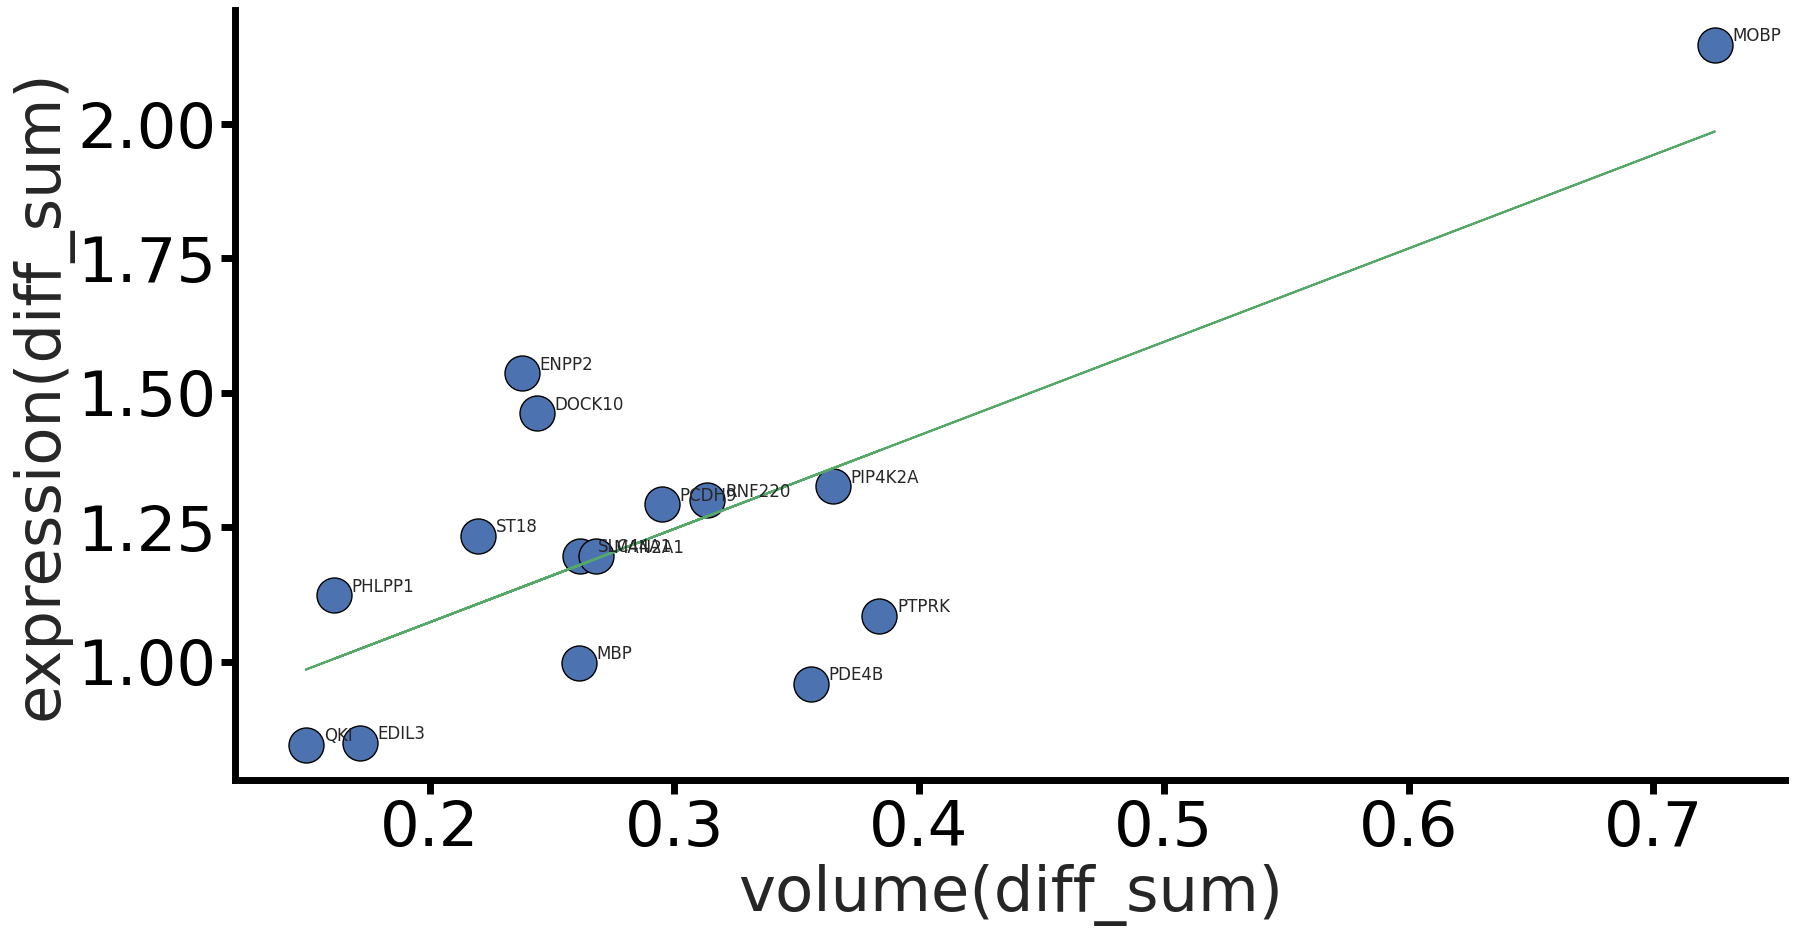

In [4]:
show(x, y, 'diff_sum', 'diff_sum', file_name='Correlation between expression and volume(diff_sum)')

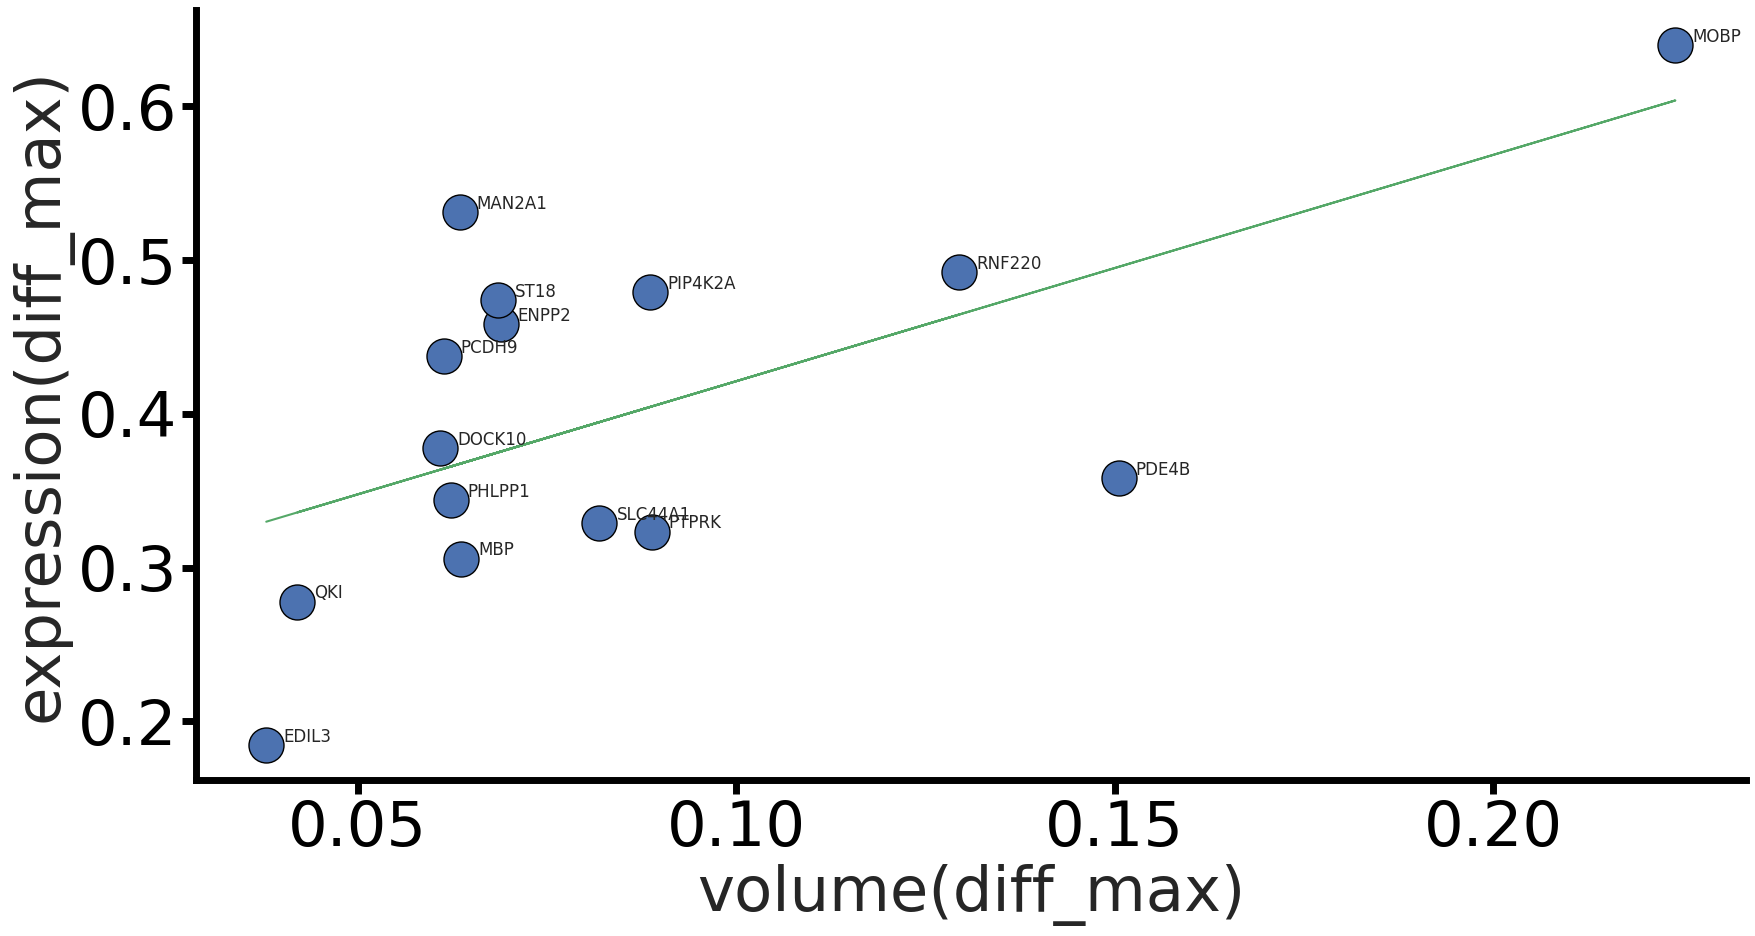

In [5]:
show(x, y, 'diff_max', 'diff_max', file_name='Correlation between expression and volume(diff_max)')

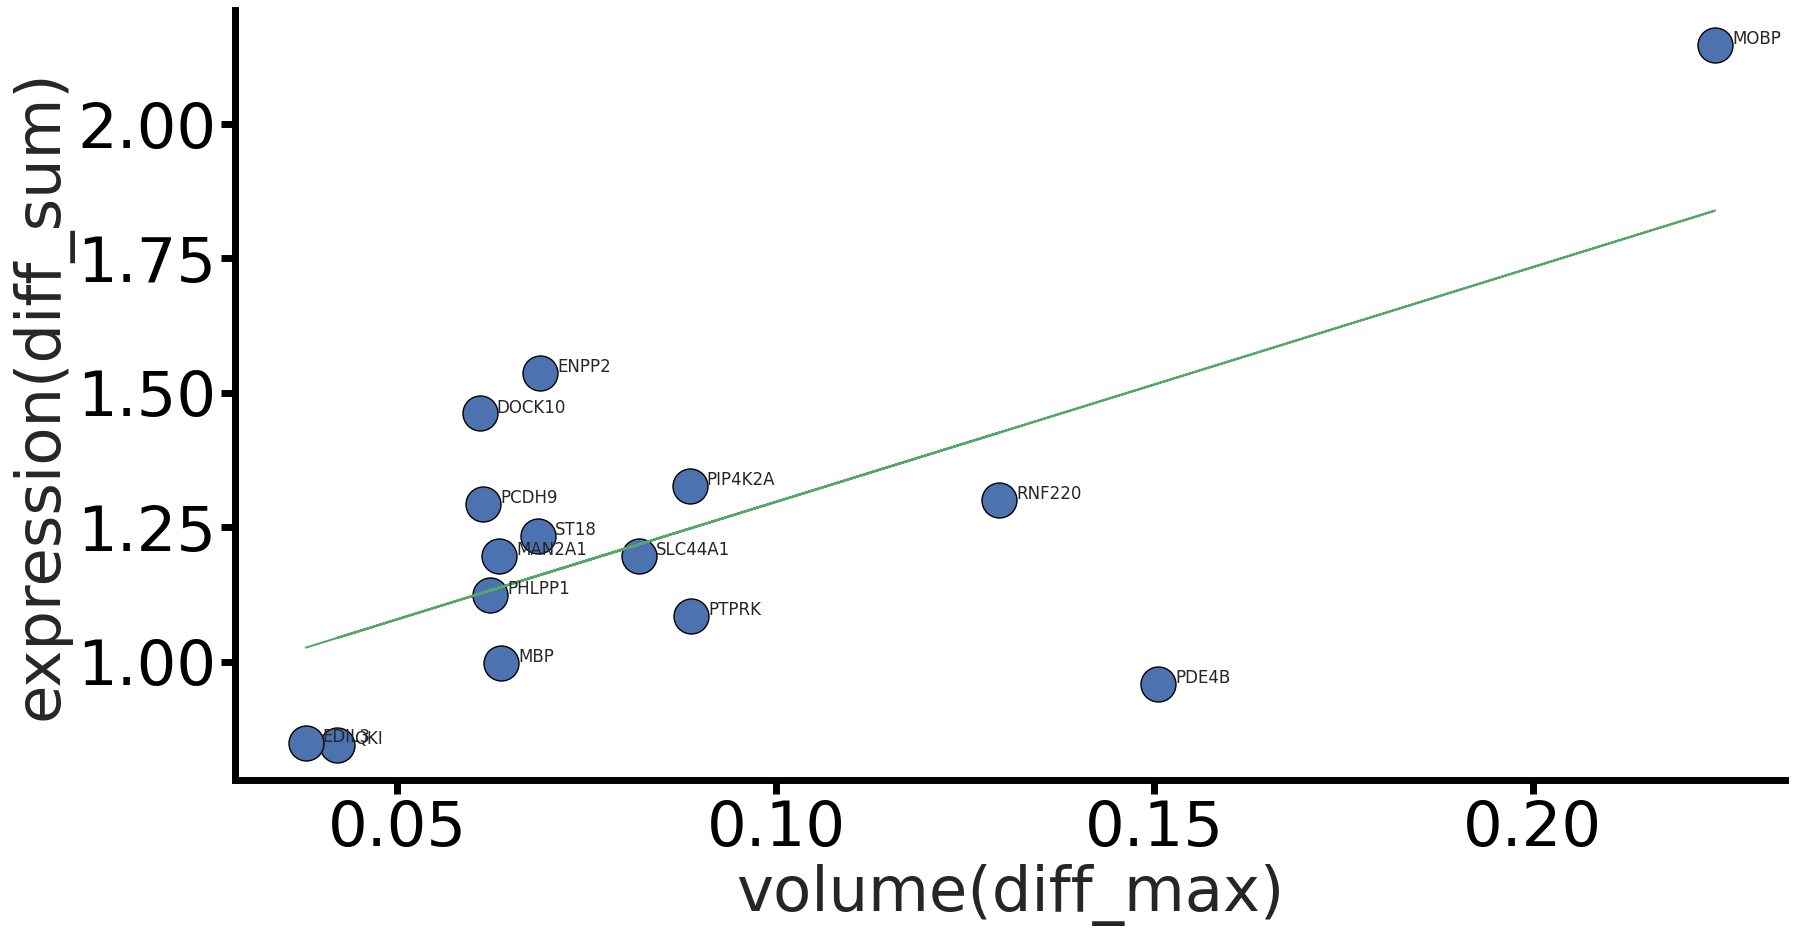

In [6]:
show(x, y, 'diff_max', 'diff_sum')

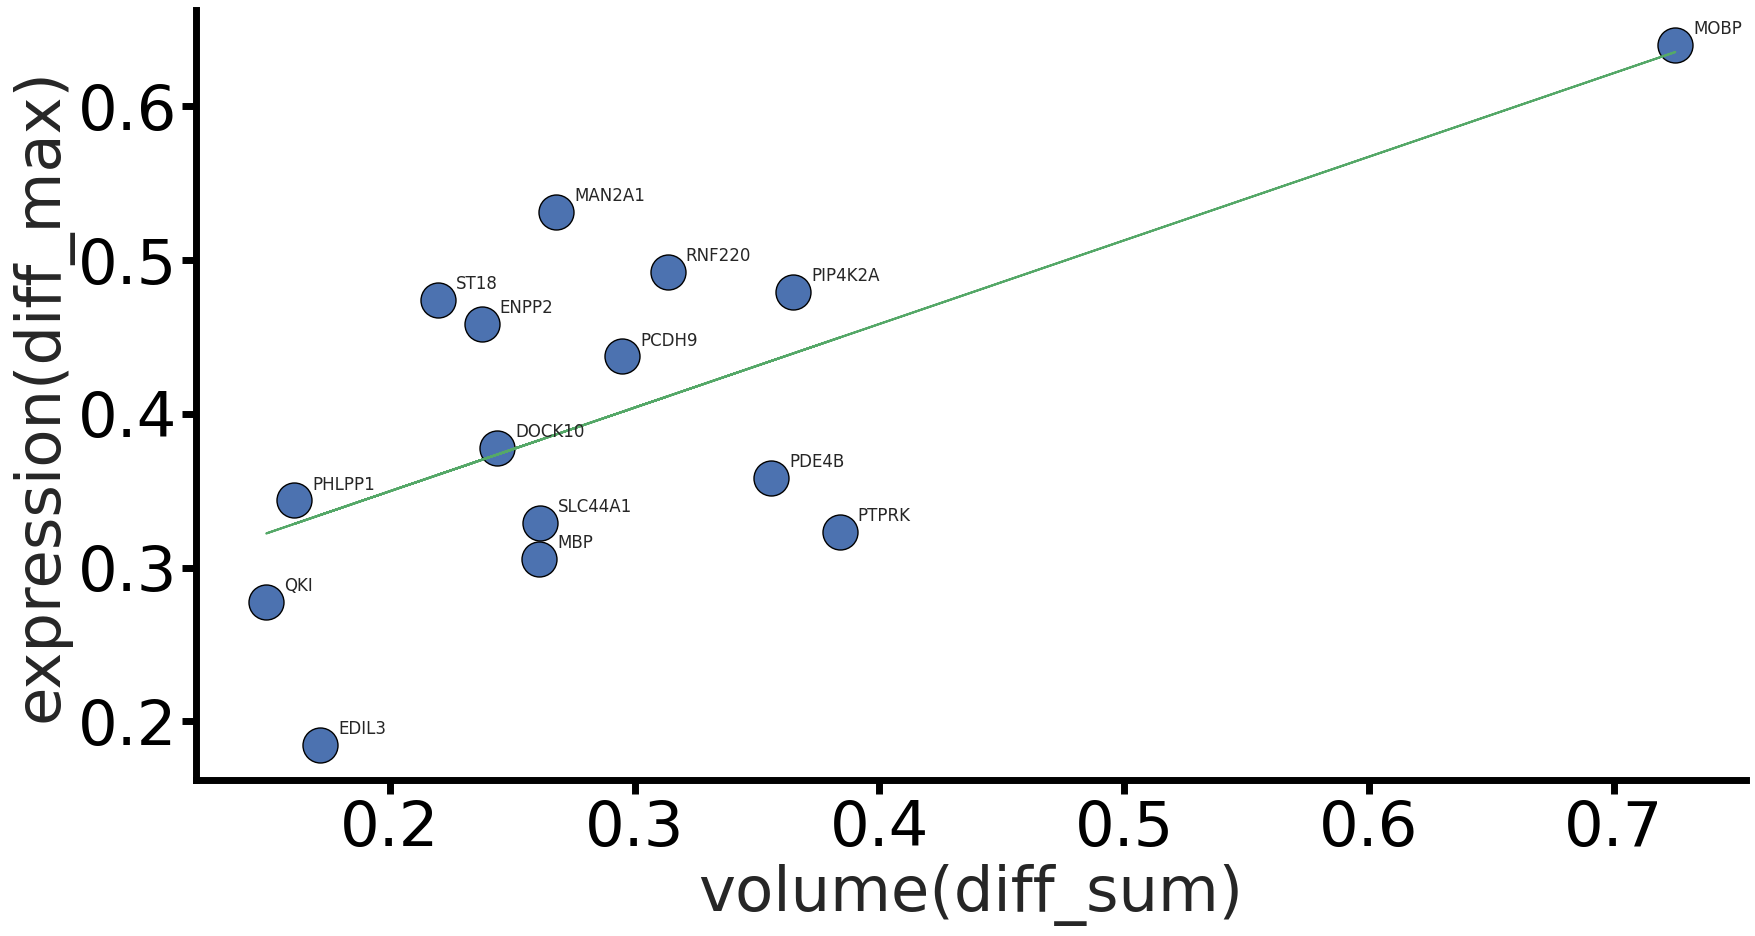

In [7]:
show(x, y, 'diff_sum', 'diff_max')